<a href="https://colab.research.google.com/github/tarun2001sharma/Motion-Estimation-using-Phase-Correlation-/blob/main/19110090_assignment3_PRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram Equilization and Histogram Specification
In this assignment we will learn about histograms, some of their applications and techinques used to play with them 

### Utils
To initialise the assignment, run these 3 cells only once

In [ ]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1gCiAZnEiEzOsrfU97Z7lk0pjDhiBnfF0'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [ ]:
!unzip -q dataset.zip
!rm -rf dataset.zip

In [ ]:
import cv2
import matplotlib.pyplot as plt

def load_image(number):
  img = cv2.imread(f"/content/original_images/img{number}.bmp")
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray

def show_image(image):
  plt.figure(figsize=(12,5))
  plt.imshow(image,cmap='gray')
  plt.axis('off')
  plt.show()

def calculate_hist(gray):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].imshow(gray,cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("Image")

  ax[1].hist(gray.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  ax[1].set_title("Histogram")
  ax[1].set_xlabel("range")
  plt.show()

def compare_matched_hist(src,dst,matched_src):
  images = [src,dst,matched_src]
  headings = ["Source","Destination","Matched Source"]
  n,m = len(images),2
  fig,ax = plt.subplots(n,m,figsize=(15,10))

  for i, (heading,img) in enumerate(zip(headings,images)):
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis('off')
    ax[i,0].set_title(heading)

    ax[i,1].hist(img.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  plt.show()

### Question 1: What are Histograms?
[1 mark]

In [ ]:
# [TODO] Write in this block
'''
Histogram is the graphical representation of data in continuous ranges where each vertical bins represents the 
frequency of all data points within the corresponding class. Histograms are usefull tool for calculating the cumulative distributive 
function.
'''

### Questions 2: Applications of Histograms?
[1]


In [ ]:
#[TODO] Write in this block
# Application of Histograms:
#   - It is useful for the visualization of the distribution of data. They are widely used as they are versatile and simple to work on.
#   - It helps to identify the most common process outcome.
#   - It Helps in analyzing the distribution of data points and thus is usefull in detecting any variations.
#   - Histogram tells us about the skewness of data plotted.
#   - Data labels are easy to convert to histogram and thus histograms are useful to spot trends in data set and any sort of symmetry.

# The major fields where histograms are used extensively are digital image processing for the graphical representation of a digital image, 
# and in hydrology to study the frequency of rainfall occurences.


## Histogram Equalizing


### Question 3: What is Histogram Equalizaiton 
[1]

In [ ]:
#[TODO] Write in this block
# Histogram equalization is a process in which the quality of low contrast images is improved.
# By equalizing the histograms the intensity is uniformly distributed across all the pixels of the image.
# By equalizing the image the contrast of the image changes significantly i.e., the dark pixels will become more darker 
# and the bright pixel will become more brigther. The highly populated intensity values is spreaded out to make the image more uniform.
# Histogram equalization is highly effective under the conditions where either there is only one object in the image 
# or there is no apparent contrast change between background and object.



### Question 4 
below are some inbuilt examples of histogram equalizing from OpenCV, your task is to reproduce them without using any inbuilts, you can use the function `calculate_hist` to show insights, also **explain your results comparing** with inbuilt. [1+1]

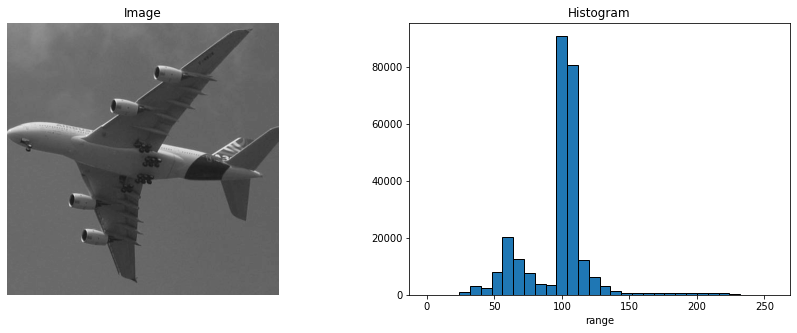

In [ ]:
gray = load_image(3)
calculate_hist(gray)

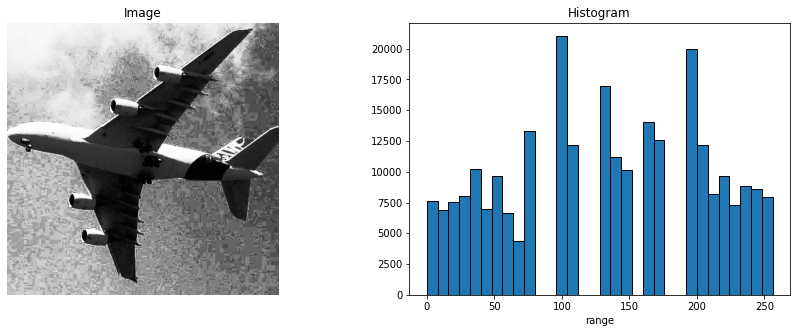

In [ ]:
equalized_gray = cv2.equalizeHist(gray)
calculate_hist(equalized_gray)
# A = cv2.createCLAHE(clipLimit =1.0, tileGridSize=(8,8)) shubh
# calculate_hist(A.apply(gray))


In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from numpy import *

def my_equalizing_histograms(src):
  """
  :param src: input image
  :rtype: image 
  :return dest: histogram equalized src image
  """
  
  rows = len(src)
  columns = len(src[0])
  
  p = [] # p is the array containing all the different pixel values
  maxi = 0 # this variable will hold the maximum pixel value
  mini = 10000 #tis variable will hold the minimum pixel value
  

  for i in range(rows):
    for j in range(columns):
      if maxi<src[i][j]:
        maxi = src[i][j]
      if mini>src[i][j]:
        mini = src[i][j]
  
  dest = []
  for i in range(rows):
    temp=[]
    for j in range(columns):

      temp.append(float(src[i][j]/maxi))
    dest.append(temp)
      
  
  dic = {} # this dictionary will have the frequency of all pixels
  p = []
  for i in range(rows):
    for j in range(columns):
      if dest[i][j] in dic:
        dic[dest[i][j]]+=1
      else:
        dic[dest[i][j]]=1
        p.append(dest[i][j])
  
  
  p.sort()
  out = []
  lst = [] # CDF of all pixel 
  count = 0
  
  for i in range(0,len(p)):
    count = count+dic[p[i]]
    lst+=[count]

  for i in range(rows):
    temp = []
    for j in range(columns):
      pixelvalue = dest[i][j]
      index = 0
      start = 0
      end = len(p) #binary search to find the corresponding index of pixel in list p and lst
      while start<end:
        middle=(start+end)//2
        if p[middle]<pixelvalue:
          start = middle+1
        elif p[middle]>pixelvalue:
          end = middle
        else:
          start = middle
          break
      if start<len(lst):
        temp.append(round((lst[start]*255)/(rows*columns)))
      else:
        temp.append((lst[len(p)-1]*255)/(rows*columns))
    out+=[temp]
  
  
  
  
   
  count = 0
 

  '''--------------------------- Shubh -----------------------------------'''
  # GHE Code 
  
  # V = []
  # Vmax = -1000000
  # Vmin = 10000000
  # for i in range(rows):
  #   temp = []
  #   for j in range(columns):
  #     I = 0
  #     count = 0
  #     for k in range(max(0,i-1),min(rows,i+1)):
  #       for l in range(max(0,j-1),min(columns,j+1)):
  #         I -= src[k][l]
  #         count+=1
  #     I+=src[i][j]*count
  #     if I < Vmin:
  #       Vmin = I
  #     if I > Vmax:
  #       Vmax = I

  #     temp.append(I)
  #   V.append(temp)
  # weight = 1/(maxi-mini)

  # new = []
  # for i in range(rows):
  #   temp = []
  #   for j in range(columns):
  #     key = float((src[i][j]-mini)/(maxi-mini))
  #     temp.append(key)
  #   new.append(temp)
  # # print(new[:10])   
  # b = 1
  # v = []
  # outtemp = []
  # for i in range(rows):
  #   temp = []
  #   for j in range(columns):
  #     if V[i][j] >= 0:
  #       temp.append(0.5*((V[i][j]/Vmax)**b))
  #     else:
  #       temp.append(-0.5*((V[i][j]/Vmin)**b))
      
  #   v.append(temp)
  
  # minnew = 1000000
  # maxnew = 0

  # for i in range(rows):
  #   temp = []
  #   for j in range(columns):
  #     temp.append(maxi*(v[i][j]*weight + new[i][j]))
  #     if maxi*(v[i][j]*weight + new[i][j])<minnew:
  #       minnew = maxi*(v[i][j]*weight + new[i][j])
  #     if maxi*(v[i][j]*weight + new[i][j])>maxnew:
  #       maxnew = maxi*(v[i][j]*weight + new[i][j])
  #   outtemp.append(temp)
  

  # dictionary = {}
  # PP = []
  # for i in range(rows):
  #   for j in range(columns):
  #     if ((outtemp[i][j])) in dictionary:
  #       dictionary[((outtemp[i][j]))]+=1
  #     else:
  #       dictionary[((outtemp[i][j]))]=1
  #       PP.append(((outtemp[i][j])))
  # PP.sort()
  # # print(outtemp[0][0])
  # # print(PP)
  # add = []
  # add.append(dictionary[PP[0]])
  # for i in range(1,len(PP)):
  #   add.append(dictionary[PP[i]]+add[i-1])
  # mindensity = 10000000
  # maxdensity = 1
  # for i in dictionary:
  #   if dictionary[i]<mindensity:
  #     mindensity = dictionary[i]
  #   if dictionary[i]>maxdensity:
  #     maxdensity = dictionary[i]
  # # print(minnew)
  # # print(maxnew)
  # # print(mindensity)
  # # print(maxdensity)
  # # print(dictionary[outtemp[0][0]])
  # # # print(add)
  # # # print(len(PP))
  # Fina = []
  # for i in range(rows):
  #   temp = []
  #   for j in range(columns):
  #     index = 0
  #     ans = 0
  #     start = 0
  #     end = len(PP)
  #     while start<end:
  #       middle=(start+end)//2
  #       if PP[middle]<outtemp[i][j]:
  #         start = middle+1
  #       elif PP[middle]>outtemp[i][j]:
  #         end = middle
  #       else:
  #         start = middle
  #         break
  #     temp.append(round((maxi-mini)*(add[start]-add[0])*(31)/(rows*columns - add[0])))


  #   Fina.append(temp)
  # calculate_hist(np.array(Fina))
  


  # # Gray = cv2.equalizeHist(src)
  # # countone = 0
  # # counttwo = 0
  # # pixelsum = 0
  # # for i in range(rows):
  # #   for j in range(columns):
  # #     countone+=abs(Gray[i][j]-Fina[i][j])
  # #     counttwo+=abs(Gray[i][j]-out[i][j])
  # #     pixelsum += Gray[i][j]
  # # print("Error in method one is",countone*100/pixelsum)
  # # print("Error in method two is",counttwo*100/pixelsum)

        

  # [TODO] 

  return np.array(out)

BY INBUILT FUNCTION


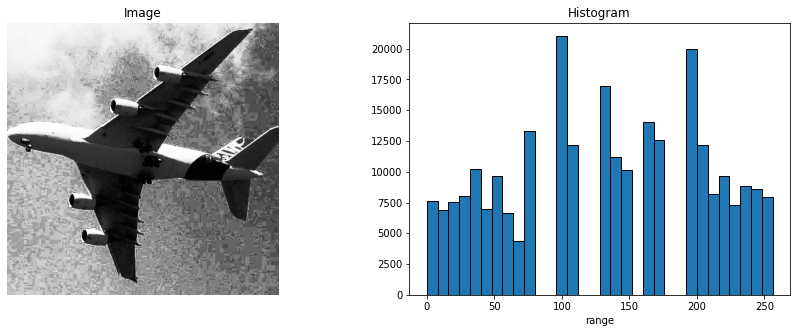

Histogram Equalization through Code


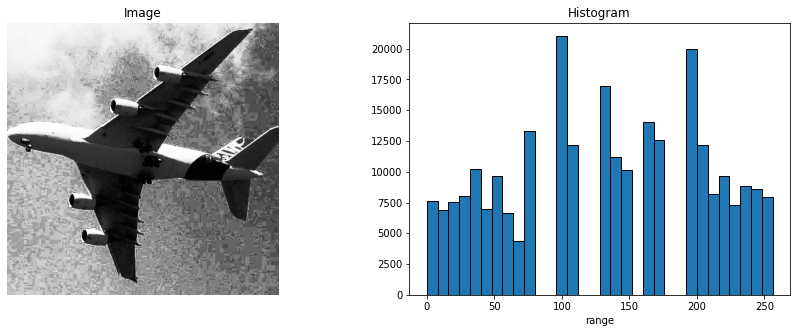

In [ ]:
# [TODO] Observation and comparisons
# my_equalizing_histograms(load_image(1))

print("BY INBUILT FUNCTION")
calculate_hist(cv2.equalizeHist(load_image(3)))
print("Histogram Equalization through Code")
# calculate_hist(np.array(out))
calculate_hist(my_equalizing_histograms(load_image(3)))
'''
As shown in the output below, both histograms (by In-built function cv2.equalizeHist and through code) are almost 
similar. The resulting image has deeper contrast than the original image. We can confirm the same by checking 
the histogram values of output image, teh bins have spreaded unformly across the range of 0-255 irrespective of the
original range. This means that certain new darkeer and lighter pixels have 
As we can see below, both the histograms, the one created by using the in-built function and the one I created
are almost same. As compared to the original image, we can see that the image now has a deeper contrast as the 
regions that were slightly dark have become much more darker and the pixels that were comparatively lighter have
become much more lighter. We can also confirm these observations through the histograms of the original image and 
the one after applying histogram equalization as the new histogram is much more spread out. The frequency values 
for the pixels have been redestributed. However, the new image is not as clear and smooth as the original one.
This is because pixels that have similar intensity values in the original image may get mapped to pixel values with 
intensities that differ by a larger amount in the output image.


'''


## Histogram Matching

### Question 5: What is Histogram Matching
[1]

In [ ]:
#[TODO] Write in this block
# Histogram matching is a process in which the contrast of an image is changed with respect to a destination image.
# The algorithm first computes the Cumulative distributive function of density of all pixel values in both source and
# destination image. Then for each pixel in source, we find the corresponding pixel value in destination image that 
# have closest CDF value as that of original pixel's CDF. The final image obtained is the matched source. 


### Question 6
below are some inbuilt examples of histogram matching from scikit image, your task is to reproduce them without using any inbuilts, you can use the function `compare_matched_hist` to show insights, also **explain your results comparing** with inbuilt.
[2+1]

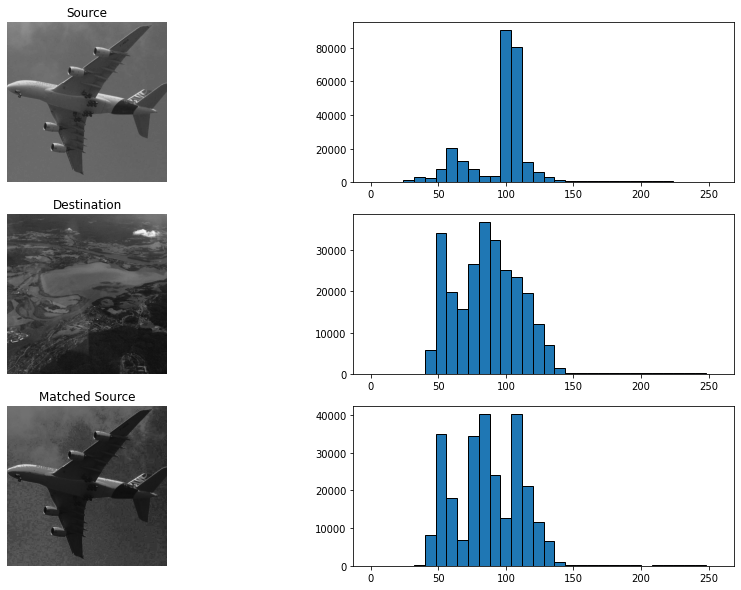

In [ ]:
from skimage import exposure

src = load_image(3)
dst = load_image(4)
matched_src = exposure.match_histograms(src,dst)

compare_matched_hist(src,dst,matched_src)

In [ ]:
def my_matching_histograms(src,dst):
  """
  :param src: input image
  :param dst: reference image
  :rtype: image 
  :return mathced_src: histogram matched src image
  """
  matched_src = exposure.match_histograms(src,dst)

  compare_matched_hist(src,dst,matched_src)
  dic = {}
  for i in range(257):
    dic[i]=0
  for i in range(len(src)):
    for j in range(len(src[0])):
      if src[i][j] in dic:
        dic[src[i][j]]+=1
      else:
        dic[src[i][j]]=1
  for i in range(1,257):
    dic[i]=dic[i]+dic[i-1]

  copy = {}
  for i in range(257):
    copy[i]=0
  for i in range(len(dst)):
    for j in range(len(dst[0])):
      if dst[i][j] in copy:
        copy[dst[i][j]]+=1
      else:
        copy[dst[i][j]]=1
  for i in range(1,257):
    copy[i]=copy[i]+copy[i-1]
  
  out = []
  for i in range(len(src)):
    temp = []
    for j in range(len(src[0])):
      density = dic[src[i][j]]
      diff = density
      
      for k in range(257):
        if abs(copy[k]-density)<=diff:
          diff = abs(copy[k]-density)
          val = k
      temp.append(val)
    out.append(temp)
  # calculate_hist(np.array(out))
  

  
  matched_src = None
  # [TODO] 

  return np.array(out)

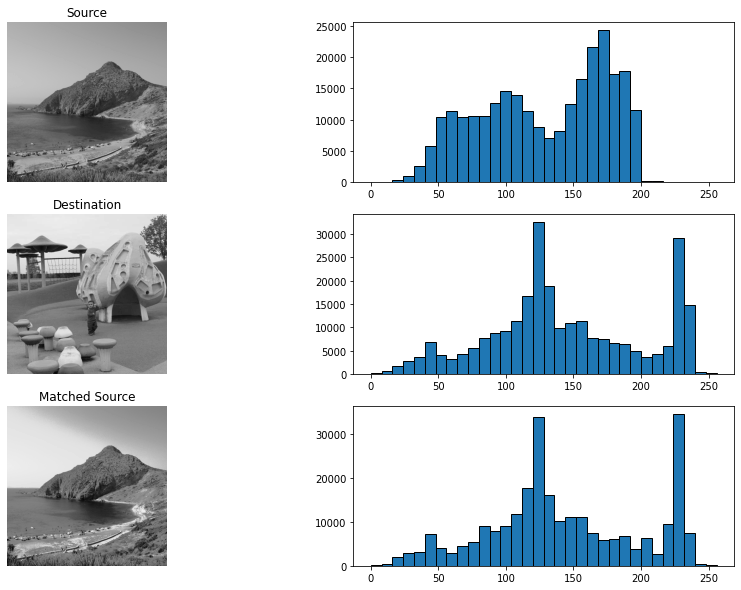

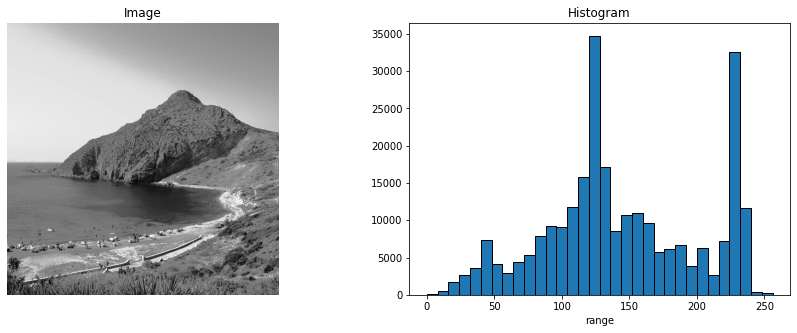

In [ ]:
# [TODO] Observation and comparisons

calculate_hist(my_matching_histograms(load_image(2),load_image(5)))



### Question 7
Checking optimization
[1]

In [ ]:
src = load_image(1)
dst = load_image(2)

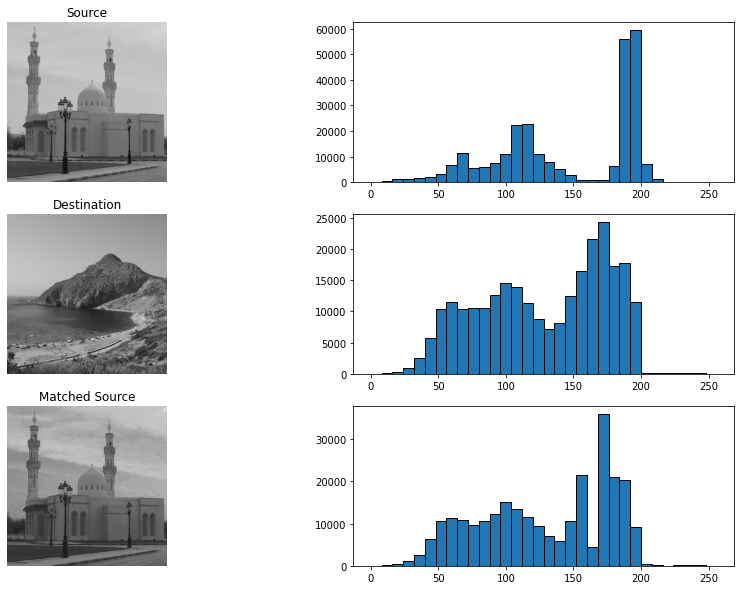

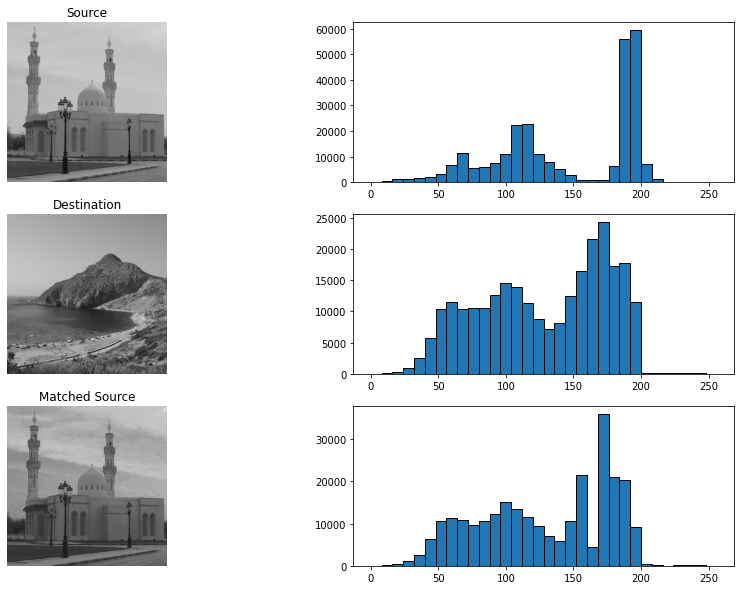

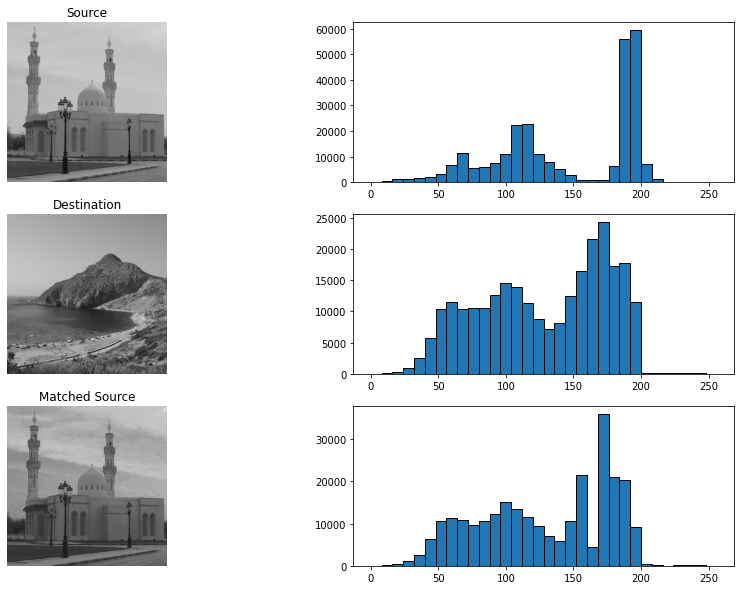

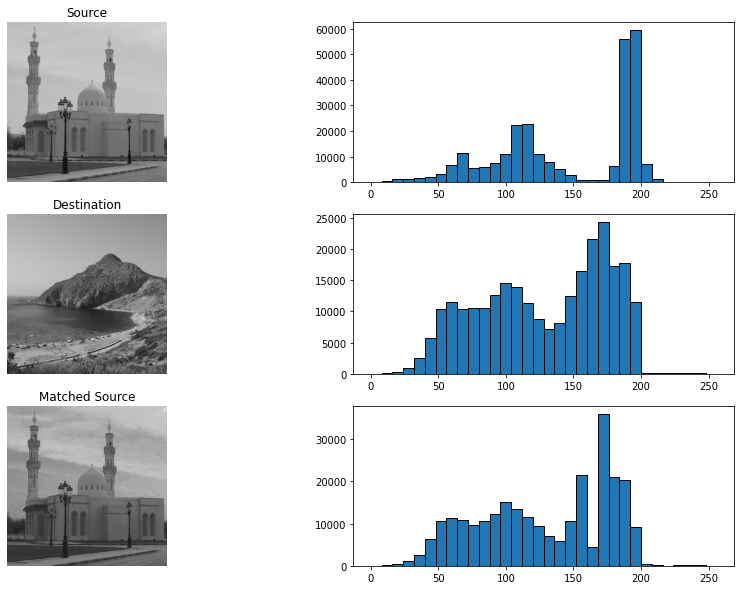

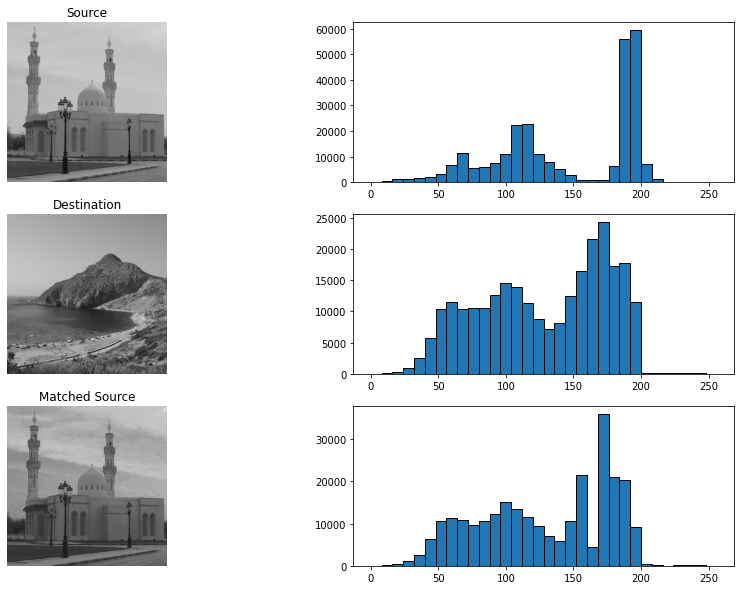

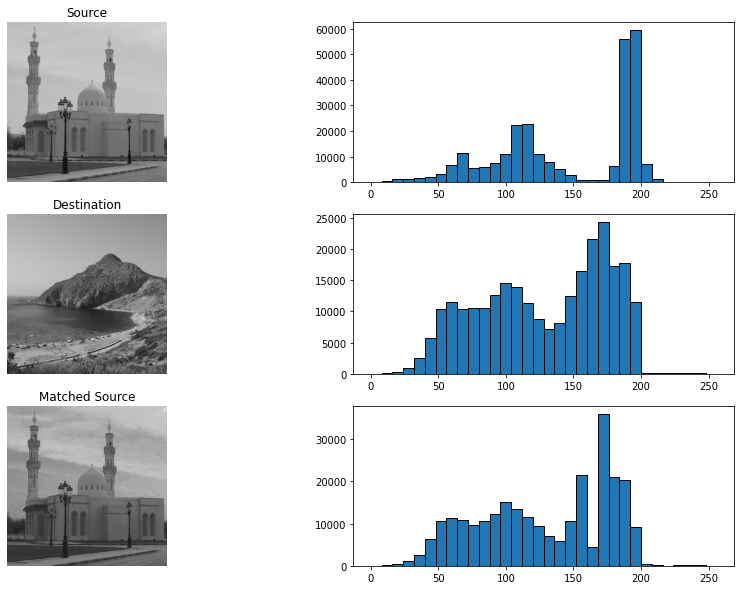

1 loop, best of 5: 21.5 s per loop


In [ ]:
%%timeit

my_equalizing_histograms(src)
my_matching_histograms(src,dst)